# Lab 1

In [22]:
# Import the libraries we'll use below.
import numpy as np
import matplotlib.pyplot as plt

## Data as matrices
Data usually comes in the form of matrices. The Python Numpy library makes it easy to manipulate matrices efficiently. See the [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html) for details.

In [23]:
# Print these to make sure you understand what is being generated.
A = np.array([1, 2, 3])
B = np.arange(1, 13).reshape(3, 4)
C = np.ones((2, 3))
D = np.eye(3)

---
### Exercise 1: Matrix manipulation (8 points)

Perform the following computations using numpy functions and print the results. Note that the `*` operator implies matrix multiplication -- make sure the dimensions align!
1. 2A + 1
2. Sum the rows of B
3. Sum the columns of B
4. Number of elements of B greater than 5
5. C + C
6. A * B
7. (B * B) - D

In [26]:
# Print out matrix, dim 
print('A: ', A, '== Dim :', A.ndim)
print('B: ', B, '== Dim :', B.ndim)
print('C: ', C, '== Dim :', C.ndim)
print('D: ', D, '== Dim :', D.ndim)


A:  [1 2 3] == Dim : 1
B:  [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] == Dim : 2
C:  [[1. 1. 1.]
 [1. 1. 1.]] == Dim : 2
D:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] == Dim : 2


In [38]:
# 1. 2A+1 

print('2A + 1: \n', 2*A +1 )

2A + 1: 
 [3 5 7]


In [45]:
# 2. Sum the rows of B

print('Sum the rows of B: \n', B.sum(axis=1) )


Sum the rows of B: 
 [10 26 42]


In [46]:
# 3. Sum the columns of B

print('Sum the columns of B: \n', B.sum(axis=0) )

Sum the columns of B: 
 [15 18 21 24]


In [41]:
# 4. Number of elements of B greater than 5

print('Total values greater than 3 are: ', np.count_nonzero(B > 5) )

Total values greater than 3 are:  7


In [42]:
# 5. C + C

print("C + C :\n " , C + C)


C + C :
  [[2. 2. 2.]
 [2. 2. 2.]]


In [47]:
# 6. A * B

print(' A * B: \n', np.dot(A,np.asarray(B)) )

 A * B: 
 [38 44 50 56]


In [49]:
# 7. (B * B) - D
product = np.dot(B,B.T)
product


print(' (B * B) - D : \n', product - D )

 (B * B) - D : 
 [[ 29.  70. 110.]
 [ 70. 173. 278.]
 [110. 278. 445.]]


---

## Data for Supervised Learning
Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

In [15]:
def create_1d_data(num_examples=10, w=2, b=1, random_scale=1):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    random_scale: add uniform noise between -random_scale and +random_scale

  Returns:
    X and Y with shape (num_examples)
  """
  #Y  =  b + w*X

  X = np.arange(num_examples)
  np.random.seed(4)  # consistent random number generation
  deltas = np.random.uniform(low=-random_scale, high=random_scale, size=X.shape)
  Y = b + deltas + w * X
  return X, Y

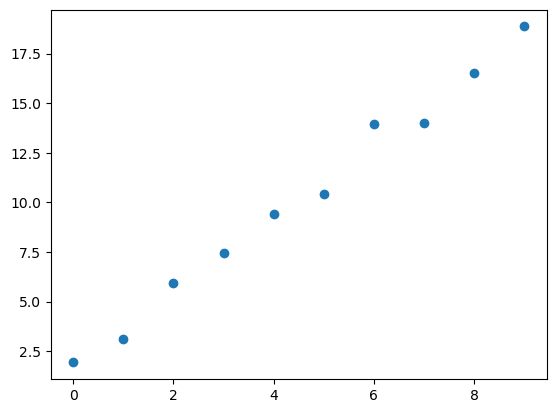

In [16]:
# Create some artificial data using create_1d_data.
X, Y = create_1d_data(num_examples = 10 , w = 2 , b = 1 , random_scale = 1)
plt.scatter(X, Y)
plt.show()

---
### Exercise 2: Models for Data (8 points)

A model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = x+5$ 
2. $M_2(x) = 2x+1$

Compute the predictions of models $M_1$ and $M_2$ for the values in $X$. These predictions should be vectors of the same shape as $Y$. Then plot the prediction lines of these two models overlayed on the "observed" data $(X, Y)$. Use [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to draw the lines.

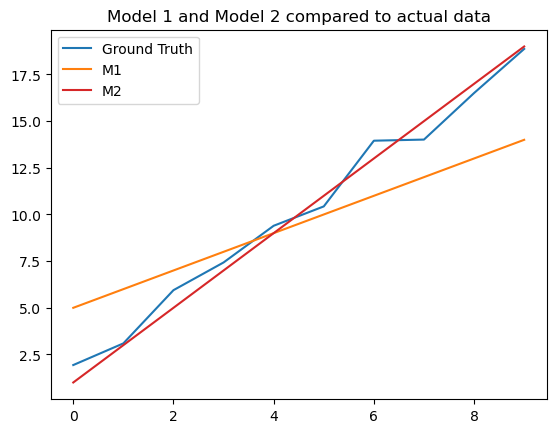

In [21]:
𝑀1 =X+5 
𝑀2 =2*X+1

plt.plot(X, Y , color = 'tab:blue' , label = 'Ground Truth')
plt.plot(X, M1 , color = 'tab:orange' , label = 'M1')
plt.plot(X, M2 , color = 'tab:red' , label = 'M2')
plt.title('Model 1 and Model 2 compared to actual data')
plt.legend()

---

## Evaluation Metrics

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{|Y|} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

---
### Exercise 3: Computing MSE (8 points)

Write a function for computing the MSE metric and use it to compute the MSE for the two models above, $M_1$ and $M_2$.

In [50]:
def MSE(true_values, predicted_values):

  """Return the MSE between true_values and predicted values."""
    # YOUR CODE HERE
  MSE = np.square(np.subtract(true_values, predicted_values)).mean()
  return(MSE)
  

In [51]:
print ('MSE for M1:', MSE(Y, M1))
print ('MSE for M2:', MSE(Y, M2))

MSE for M1: 6.839502909434264
MSE for M2: 0.45821672338761366


---

## Generalization

Our data $(X, Y)$ represents just a sample of all possible input-output pairs we might care about. A model will be useful to the extent we can apply it to new inputs. Consider the more complex model below, which appears to produce a much smaller mean squared error.

MSE for M3: 0.10941956925521527


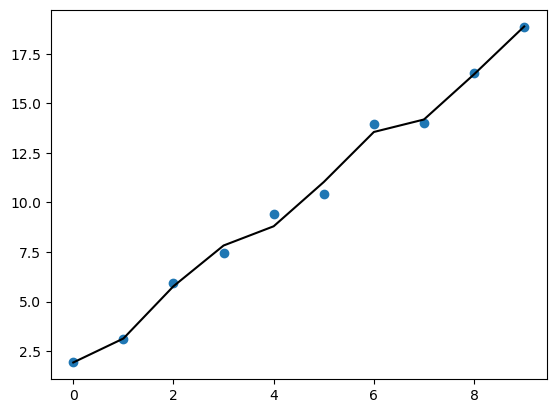

In [52]:
# Fit an 8-th degree polynomial to (X, Y). See np.polyfit for details.
polynomial_model_coefficients = np.polyfit(X, Y, deg=8)
polynomial_model = np.poly1d(polynomial_model_coefficients)
M3 = polynomial_model(X)
fig = plt.scatter(X, Y)
plt.plot(X, M3, '-k')
print ('MSE for M3:', MSE(Y, M3))

---
### Exercise 4: Generalization (8 points)

Explain whether you expect $M_3$ to be better than $M_2$ at predicting the labels for new unseen inputs.

*Writen answer:*

M3 is a better model because Mean squared error is least (MSE), but there is a risk of over fitting.

---

## Review

* In **Supervised Machine Learning**, we must start with data in the form $(X,Y)$ where $X$ are the inputs and $Y$ are the output labels.
* A **model** is a function that maps an input $x$ to an output $y$. The model's output is referred to as a **prediction**, denoted by $\hat{y}$.
* We **evaluate** predictions by comparing them to the true labels. This measurement is called a **loss** or **error**. For real-valued data, **mean squared error** is a common metric.
* A model is only as good as its ability to **generalize** to new examples.